<img src="./img/uomlogo.png" align="left"/><br><br>
# PHYS20762 - Project - Measuring Drop Spreading Law

Draga Pihler-Puzovic<br>
University of Manchester  
January 2021

We first initialise our Python interpreter

In [1]:
# Initialisation
import string
from math import *
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.optimize import curve_fit

plt.rcParams.update({'font.size': 14})
plt.style.use('default')

![](./img/bee.png)
## Experimental Data

This is data that you are working with. It consists of a sequence of circle radii ($R$, measured in micrometers), obtained from image processing in three different experimental runs. The corresponding time ($t$, measured in seconds) was obtained from the image timestamps measured from the beginning of the experiment.     

In [2]:
# Radius data 
# experiment 1
radius_data1 = np.array([59.513027, 66.368389, 69.506166, 71.700852, 74.735925, 76.007795, 76.695256, 78.039551, 79.598386, 80.075493, 80.079624, 81.495363, 82.598934, 83.172805, 84.919440, 85.155809, 85.718415, 85.920147, 86.000243, 87.120934, 87.507943, 87.786892, 87.060409, 88.086562, 88.113767, 88.436448, 89.082172, 89.139957, 89.210538, 89.356928, 90.312937, 90.406557, 90.754907, 90.88941, 91.096467])
# experiment 2
radius_data2 = np.array([59.810888, 65.360919, 69.088934, 72.594631, 74.694093, 76.440186, 78.133942, 78.618537, 79.753566, 80.745559, 81.422723, 81.634563, 82.861597, 84.335873, 85.362055, 85.537714, 86.159399, 86.873675, 86.918131, 87.003533, 87.126402, 87.155440, 87.224911, 87.394479, 87.433936, 87.626938, 87.701465, 87.834029, 87.963874, 88.153147, 88.209880, 88.542036, 88.86527, 89.082038, 89.214132])
# experiment 3
radius_data3 = np.array([58.200029, 64.826353, 69.332991, 73.504694, 74.295033, 77.506575, 78.413291, 79.952682, 81.339708, 81.938359, 82.528196, 82.807452, 83.378999, 84.521468, 84.507216, 85.064265, 85.247146, 85.900079, 86.475709, 86.776052, 87.158810, 87.343755, 87.448085, 87.822712, 88.140434, 88.311032, 88.619312, 88.970210, 89.373613, 89.754486, 89.900430, 90.116608, 90.288358, 90.711677, 90.989783])
# time
time = np.array([0.500000, 1.000000, 1.500000, 2.000000, 2.500000, 3.000000, 3.500000, 4.000000, 4.500000, 5.000000, 5.500000, 6.000000, 6.500000, 7.000000, 7.500000, 8.000000, 8.500000, 9.000000, 9.500000, 10.000000, 10.500000, 11.000000, 11.500000, 12.000000, 12.500000, 13.000000, 13.500000, 14.000000, 14.500000, 15.000000, 15.500000, 16.000000, 16.500000, 17.000000, 17.500000])

Let's plot this data to see what it looks like:

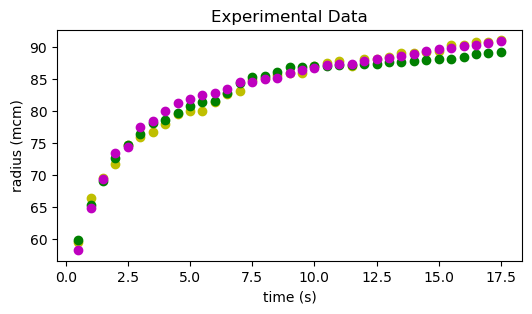

In [3]:

# tweeking the figure size
plt.rcParams["figure.figsize"] = (6,3)
plt.figure()
# plotting data from experimental runs 1-3:
plt.plot(time, radius_data1, "yo")
plt.plot(time, radius_data2, "go")
plt.plot(time, radius_data3, "mo")
# setting axis labels & figures 
plt.xlabel("time (s)")
plt.ylabel("radius (mcm)")
plt.title("Experimental Data")
# displaying the plot
plt.show()


Don't forget to find the errors on $R$ estimated from the three experimental runs.

![](./img/bee.png)
## Extracting Quantities Using Experimental Data

In order to find the spreading law: a relationship between the speed of the contact line ($U$) and the contact angle ($\theta$), we need to first find the quantities themselves, ie express $U$ and $\theta$ using $R=R(t)$. 

To speed of the contact line can be calculated using $U = \frac{dR}{dt} \approx \frac{R(t+\delta t)-R(t)}{\delta t}$, where $R(t+\delta t)$ and $R(t)$ are two sequential values of the footprint radii measured with time intreval $\delta t$ apart.  

To find the contact angle, we make the spherical cap approximation that allows us to calculate the height of the drop ($H$) from its volume ($V=7.6$ pL) and its footprint radius ($R$) which are known from experiments via relationship $V=\frac{\pi}{6}H(3R^2+H^2)$. The contact angle can then be found from $R$ and $H$ using $\theta = \frac{\pi}{2} - \mathrm{atan}\frac{R^2-H^2}{2HR}$. 

There are three sets of experimental data, so for each one of them a relationship $U=U(\theta)$ should be found.

In [4]:
VOLUME = 7.6 * 10**(-15) #cubic meter

# Radius data 
# experiment 1
radius_data1 = np.array([59.513027, 66.368389, 69.506166, 71.700852, 74.735925, 76.007795, 76.695256, 78.039551, 79.598386, 80.075493, 80.079624, 81.495363, 82.598934, 83.172805, 84.919440, 85.155809, 85.718415, 85.920147, 86.000243, 87.120934, 87.507943, 87.786892, 87.060409, 88.086562, 88.113767, 88.436448, 89.082172, 89.139957, 89.210538, 89.356928, 90.312937, 90.406557, 90.754907, 90.88941, 91.096467])
# experiment 2
radius_data2 = np.array([59.810888, 65.360919, 69.088934, 72.594631, 74.694093, 76.440186, 78.133942, 78.618537, 79.753566, 80.745559, 81.422723, 81.634563, 82.861597, 84.335873, 85.362055, 85.537714, 86.159399, 86.873675, 86.918131, 87.003533, 87.126402, 87.155440, 87.224911, 87.394479, 87.433936, 87.626938, 87.701465, 87.834029, 87.963874, 88.153147, 88.209880, 88.542036, 88.86527, 89.082038, 89.214132])
# experiment 3
radius_data3 = np.array([58.200029, 64.826353, 69.332991, 73.504694, 74.295033, 77.506575, 78.413291, 79.952682, 81.339708, 81.938359, 82.528196, 82.807452, 83.378999, 84.521468, 84.507216, 85.064265, 85.247146, 85.900079, 86.475709, 86.776052, 87.158810, 87.343755, 87.448085, 87.822712, 88.140434, 88.311032, 88.619312, 88.970210, 89.373613, 89.754486, 89.900430, 90.116608, 90.288358, 90.711677, 90.989783])
# time in seconds
time = np.array([0.500000, 1.000000, 1.500000, 2.000000, 2.500000, 3.000000, 3.500000, 4.000000, 4.500000, 5.000000, 5.500000, 6.000000, 6.500000, 7.000000, 7.500000, 8.000000, 8.500000, 9.000000, 9.500000, 10.000000, 10.500000, 11.000000, 11.500000, 12.000000, 12.500000, 13.000000, 13.500000, 14.000000, 14.500000, 15.000000, 15.500000, 16.000000, 16.500000, 17.000000, 17.500000])

#Converting the values of radius from micrometer to meter
radius_data1 *= 10**(-6)
radius_data2 *= 10**(-6)
radius_data3 *= 10**(-6)

def function_H(radius_data):
    #Function to calculate the values of H
    #radius_data is an array containing all the values of radius (float) in meter
    #Return values of H are store in an array (float) in meter

    H_values = np.zeros(len(radius_data))
    temp = 0
    while temp < len(radius_data):
        H_coefficients = [1, 0, 3 * radius_data[temp]**2, -6 * VOLUME / np.pi]
        
        for roots in np.roots(H_coefficients):
            if np.isreal(roots):
                
                H_values[temp] = np.real(roots)
        temp += 1
    return H_values

def function_theta(radius_data, H_data):
    #Function to calculate the values of theta (contact angle) in radian
    #radius_data is an array containing all the values of radius (float) in meter
    #H_data is an array containing all the values of H (float) in meter
    #Return values of theta are stored in an array (float) in radian

    theta_values = np.zeros(len(radius_data))
    temp = 0
    while temp < len(radius_data):
        theta_values[temp] = (np.pi / 2) - np.arctan((radius_data[temp]**2 - H_data[temp]**2) / (2 * H_data[temp] * radius_data[temp]))
        temp += 1
    return theta_values

def time_derivative(data, time):
    dxdt = np.diff(data)/np.diff(time)
    return dxdt

speed_data = [time_derivative(radius_data1, time), time_derivative(radius_data2, time), time_derivative(radius_data3, time)]
H_data = [function_H(radius_data1), function_H(radius_data2), function_H(radius_data3)]
theta_data = [function_theta(radius_data1, H_data[0]), function_theta(radius_data2, H_data[1]), function_theta(radius_data3, H_data[2])]


Let's plot these results to see what they look like:

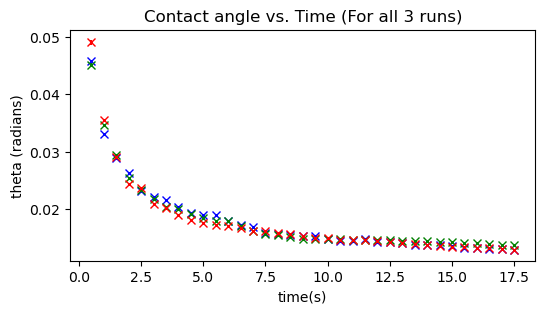

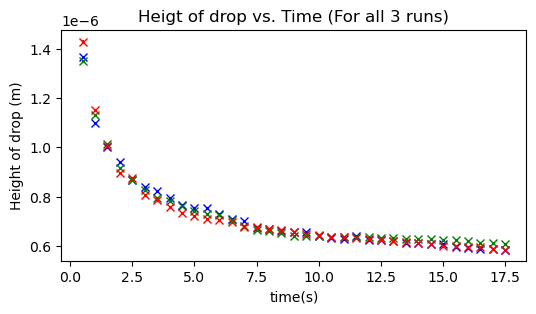

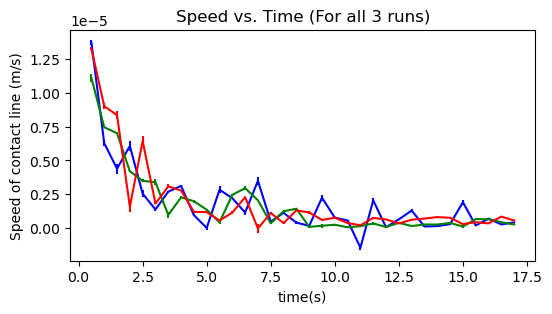

In [5]:
def plot_graph(number_of_data, x_values, y_values, yerror, graph_details, colors):
    # graph_details = ['x-label', 'y-label', 'graph title']
    # tweeking the figure size
    plt.rcParams["figure.figsize"] = (6,3)
    plt.figure()
    
    if number_of_data == 1:
        plt.errorbar(x_values, y_values, yerr=yerror, fmt=colors[0])
    else:
        for n in range(number_of_data):
            # plotting data from experimental runs 1-3 for H:
            plt.errorbar(x_values, y_values[n], yerr=yerror[n], fmt=colors[n])
        
    # setting axis labels & figures 
    plt.xlabel(graph_details[0])
    plt.ylabel(graph_details[1])
    plt.title(graph_details[2])
    # displaying the plot
    plt.show()
    
#Calculate the average values of the 3 experimental runs
def average_total_values(data):
    N = 0
    if len(data) == 1:
        N = len(data)
        average_values = np.zeros(N)
    else:
        N = len(data[0])
        average_values = np.zeros(N)
    temp = 0
    while temp < N:
        temp_array = np.zeros(3)
        for n in range(3):
            temp_array[n] = data[n][temp]
        average_values[temp] = np.average(temp_array)
        temp += 1
    return average_values

def standard_deviation(data):
    average_value = average_total_values(data)
    
    if len(data) == 1:
        s = np.zeros(len(data)) 
    else:
        s = np.zeros((len(data), len(data[0])))
    
    i = 0
    while i < len(data):
        N = len(data[i])
        
        for j in range(N):
            s[i][j] = np.sqrt(np.sum((data[i][j]-average_value[j])**2)/N)
        i += 1
    return s

colors_cross = ['bx', 'gx', 'rx', 'yx', 'mx', 'yx', 'kx', 'wx']
colors_line = ['b-', 'g-', 'r-', 'y-', 'm-', 'y-', 'k-', 'w-']

#Plot graph of contact angle vs time
theta_graph_details = ['time(s)', 'theta (radians)', 'Contact angle vs. Time (For all 3 runs)']
plot_graph(3, time, theta_data, standard_deviation(theta_data), theta_graph_details, colors_cross)

#Plot graph of H (Height of drop) vs time
H_graph_details = ['time(s)', 'Height of drop (m)', 'Heigt of drop vs. Time (For all 3 runs)']
plot_graph(3, time, H_data, standard_deviation(H_data), H_graph_details, colors_cross)

#Plot graph of U (Speed of contact line) vs time
speed_graph_details = ['time(s)', 'Speed of contact line (m/s)', 'Speed vs. Time (For all 3 runs)']
plot_graph(3, time[:len(time)-1], speed_data, standard_deviation(speed_data), speed_graph_details, colors_line)     


The data $U=U(\theta)$ obtained for each of the three experimental runs is used to estimate the relationship between the mean contact line speed and the mean contact angle, and the corresponding errors on those. The result of this is plotted below. 

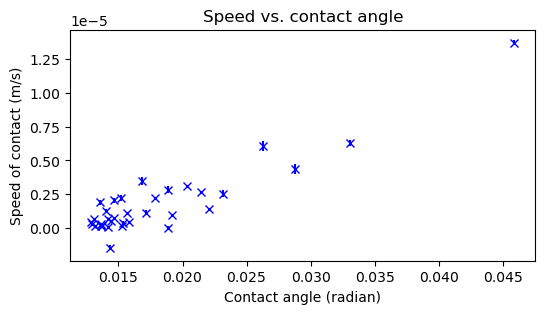

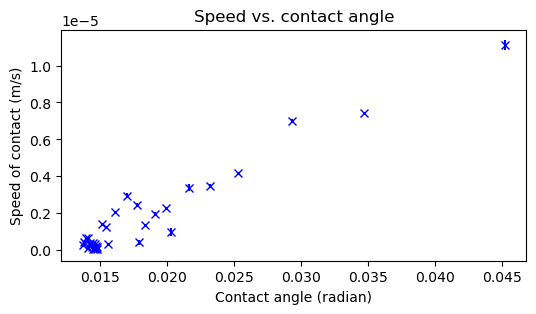

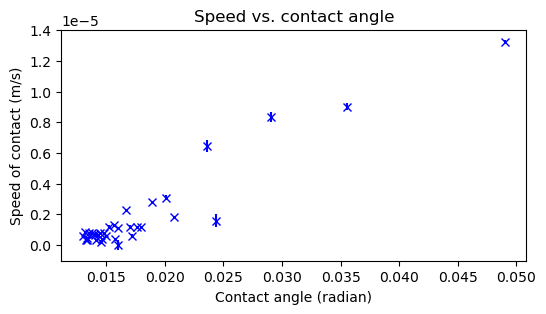

In [6]:
def mean(data):
    N = len(data[0])
    mean_val = np.zeros(N)
    temp = 0
    while temp < N:
        temp_array = np.zeros(3)
        for n in range(3):
            temp_array[n] = data[n][temp]
        mean_val[temp] = np.mean(temp_array)
        temp += 1
    return mean_val

std_speed = standard_deviation(speed_data)

graph_details = ['Contact angle (radian)', 'Speed of contact (m/s)', 'Speed vs. contact angle']
#Graph of first experiment
plot_graph(1, theta_data[0][:len(theta_data[0])-1], speed_data[0], std_speed[0], graph_details, colors_cross)
#Graph of second experiment
plot_graph(1, theta_data[1][:len(theta_data[1])-1], speed_data[1], std_speed[1], graph_details, colors_cross)
#Graph of third experiment
plot_graph(1, theta_data[2][:len(theta_data[2])-1], speed_data[2], std_speed[2], graph_details, colors_cross)


![](./img/bee.png)
## Fitting Spreading Laws

We will now attemp to fit the Cox-Voinov law ($U = U_0( \theta^3 –  \theta_0^3)$) and the de Gennes law ($U = U_0( \theta^2 –  \theta_0^2)$) to the mean data $U=U(\theta)$ ploted above, where $U_0$ is termed the characteristic speed of the contact line, and $\theta_0$ is the equilibrium contact angle (when $\theta=\theta_0$, $U=0$). To avoid using nonlinear least square method, we will fit a straight line to the data $U=U(\theta^2)$ and $U=U(\theta^3)$. This will produce the values for the characteristic speed and the error on it $U_0^{fit} \pm \delta U_0^{fit}$, but it will not give the values of the equilibrium contact angle $\theta_0^{fit}$. Instead, $[U_0\theta^n]^{fit}$ with $n=2$ or $n=3$ will be found, from which $\theta_0$ can be comupted. The corresponding error $\delta\theta^{fit}$ should be found by propagating the errors from  $[U_0\theta^n]^{fit}$ and $U_0^{fit}$.

In [12]:
#Function of straight line 
def straight_function(x, a, b):
    return a * x + b

#Function to calculate equilibrium contact angle
def char_theta(C, char_U, n):
    return (-C / char_U)**(1/n)

#Function to calculate the uncertainty of equilibrium contact angle
def char_theta_err(U_err, U, C_err, C, n, theta_0):
    return theta_0 * np.sqrt(((C_err/C)**2 - (U_err/U)**2)/n) 

#Cox-Voinov function
def cox_voinov(theta):
    return popt_CV[0] * (theta**3 - theta_0_CV)

#De Gennes function
def de_gennes(theta):
    return popt_DG[0] * (theta**2 - theta_0_DG)

#To find the error of the best fit graph
def error_fit(y_value, fx_value):
    sigma_val = np.zeros(len(y_value))
    temp = 0
    for n in range(len(y_value)):
        sigma_val[n] = np.sqrt(np.sum(np.power(y_value[n] - fx_value[n], 2)) / (len(y_value) - 2))
    return sigma_val

#Calculate the mean values of speed and theta
mean_speed = mean(speed_data)
mean_theta = mean(theta_data)
mean_theta = mean_theta[:len(mean_theta)-1]

#Function to calculate the values of the parameters that fit the data 
#def best_fit(speed, theta, function):
popt_CV, pcov_CV = curve_fit(straight_function, mean_theta**3, mean_speed)
popt_DG, pcov_DG = curve_fit(straight_function, mean_theta**2, mean_speed)

#Find the error of the fit graph
sigma_fit_CV = error_fit(mean_speed, straight_function(mean_theta**3, popt_CV[0], popt_CV[1]))
sigma_fit_DG = error_fit(mean_speed, straight_function(mean_theta**2, popt_DG[0], popt_DG[1]))

#Calculate the standard deviation of the mean value of speed and theta
mean_speed_std = np.std(speed_data, axis=0)
mean_theta_std = np.std(theta_data, axis=0)
mean_theta_std = mean_theta_std[:len(mean_theta_std)-1]

#Generate the values of theta to plot in graph of best fit
theta_val_CV = np.linspace(np.amin(mean_theta**3), np.amax(mean_theta**3), 1000)
theta_val_DG = np.linspace(np.amin(mean_theta**2), np.amax(mean_theta**2), 1000)

#Calculate the error of the U_0 and C of Cox Voinov law
U_0_err_CV = np.sqrt(np.diag(pcov_CV))[0]
C_err_CV = np.sqrt(np.diag(pcov_CV))[1]
#Calculate the error of the U_0 and C of de Gennes law
U_0_err_DG = np.sqrt(np.diag(pcov_DG))[0]
C_err_DG = np.sqrt(np.diag(pcov_DG))[1]

#Cox-Voinov Law
#Calculate the equilibrium contact angle and its error
theta_0_CV = char_theta(-popt_CV[1], popt_CV[0], 3)
err_theta_0_CV = char_theta_err(U_0_err_CV, popt_CV[0], C_err_CV, popt_CV[1], 3, theta_0_CV)
print('For Cox-Voinov Law:\n 1. Characteristic speed: {:04.1e} +- {:04.1e}\n 2. Equilibrium contact angle: {:04.1e} +- {:04.1e}'.format(popt_CV[0], U_0_err_CV, theta_0_CV, err_theta_0_CV))

#De Gennes Law
#Calculate the equilibrium contact angle and its error
theta_0_DG = char_theta(popt_DG[1], popt_DG[0], 2)
err_theta_0_DG = char_theta_err(U_0_err_DG, popt_DG[0], C_err_DG, popt_DG[1], 2, theta_0_DG)
print('For De Gennes Law:\n 1. Characteristic speed: {:04.1e} +- {:04.1e}\n 2. Equilibrium contact angle: {:04.1e} +- {:04.1e}'.format(popt_DG[0], U_0_err_DG, theta_0_DG, err_theta_0_DG))

print('\nNotes: C represents -U_0*theta_0^3 in Cox-Voinov Law and -U_0*theta_0^2 in De Gennes Law')


For Cox-Voinov Law:
 1. Characteristic speed: 1.3e-01 +- 8.7e-03
 2. Equilibrium contact angle: 1.6e-02 +- 2.7e-03
For De Gennes Law:
 1. Characteristic speed: 6.6e-03 +- 2.6e-04
 2. Equilibrium contact angle: 9.6e-03 +- 1.5e-03

Notes: C represents -U_0*theta_0^3 in Cox-Voinov Law and -U_0*theta_0^2 in De Gennes Law


Displaying the corresponding fits  

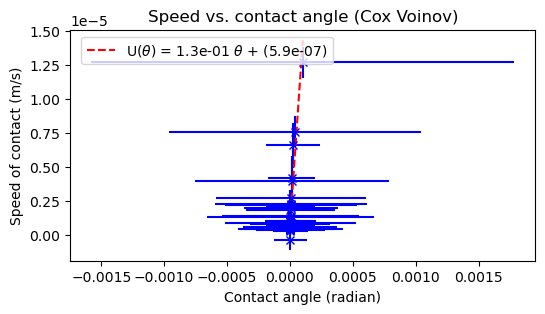

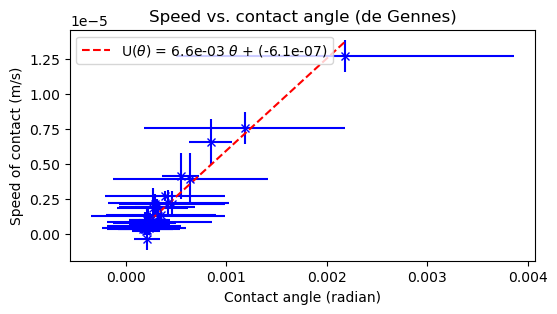

In [8]:
# Plot best fit line for Cox Voinov law
# tweeking the figure size
plt.rcParams["figure.figsize"] = (6,3)
plt.figure()
plt.errorbar(mean_theta**3, mean_speed, yerr=mean_speed_std, xerr=mean_theta_std, fmt='bx')
plt.plot(theta_val_CV, straight_function(theta_val_CV, popt_CV[0], popt_CV[1]), 'r--', label='U($\\theta$) = {:04.1e} $\\theta$ + ({:04.1e})'.format(popt_CV[0], popt_CV[1]))
# setting axis labels & figures     
plt.xlabel('Contact angle (radian)')
plt.ylabel('Speed of contact (m/s)')
plt.title('Speed vs. contact angle (Cox Voinov)')
plt.legend(loc=1, bbox_to_anchor=(0.58,1))
# displaying the plot
plt.show()

# Plot best fit line for de Gennes law
# tweeking the figure size
plt.rcParams["figure.figsize"] = (6,3)
plt.figure()
plt.errorbar(mean_theta**2, mean_speed, yerr=mean_speed_std, xerr=mean_theta_std, fmt='bx')
plt.plot(theta_val_DG, straight_function(theta_val_DG, popt_DG[0], popt_DG[1]), 'r--', label='U($\\theta$) = {:04.1e} $\\theta$ + ({:04.1e})'.format(popt_DG[0], popt_DG[1]))
# setting axis labels & figures     
plt.xlabel('Contact angle (radian)')
plt.ylabel('Speed of contact (m/s)')
plt.title('Speed vs. contact angle (de Gennes)')
plt.legend(loc=1, bbox_to_anchor=(0.58,1))
# displaying the plot
plt.show()


![](./img/bee.png)
## Chi-squared Test

To establish which of the two laws better fits the data, we conduct the chi-squared test. The case is further strengthened using the residual plots. 

In [40]:
#Function to calculate the chi-sqr 
def reduced_chi_sqr(function, y_val, error, Ndof):
    a = y_val-function
    r = (a/error)**2
    s = np.sum(r) / (len(y_val) - Ndof)
    return s

#Calculate the reduced chi squared of both functions
chi2_CV = reduced_chi_sqr(cox_voinov(mean_theta), mean_speed, sigma_fit_CV, 2)
chi2_DG = reduced_chi_sqr(de_gennes(mean_theta), mean_speed, sigma_fit_DG, 2)


![](./img/bee.png)
## Drop Spreading Law Is

The results of the chi-squared analysis suggest that the "" law is a better fit for the behaviour of the spreading drop because ...  

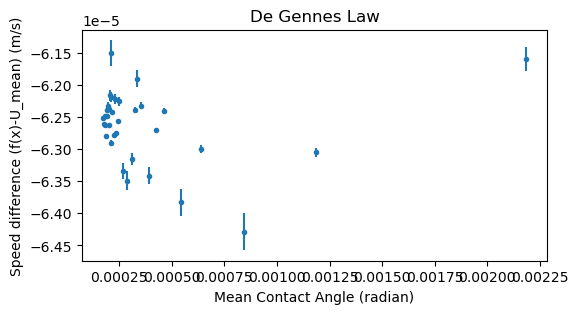

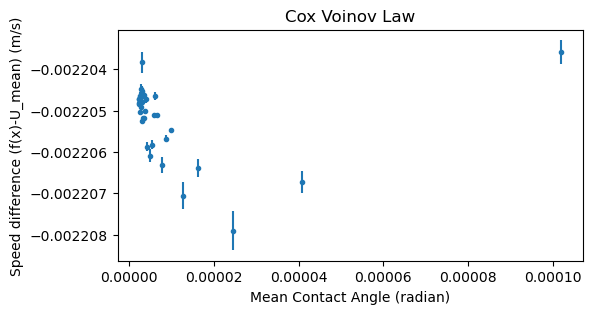

Reduced chi squared of de Gennes Law: 42941363.96
Reduced chi squared of Cox Voinov Law: 12141075459.42

From the graph of drop spreading law it can be seen that de Gennes law fit the results much better than Cox Voinov
as such since it has a smaller reduced chi squared value, therefore, de Gennes is a better fit for the behaviour of the drop spreading law


In [49]:
#Plotting experimental data and the linear fit for De Gennes
plt.rcParams["figure.figsize"] = (6,3)
plt.figure()
plt.errorbar(mean_theta**2, de_gennes(mean_theta)-mean_speed, yerr=sigma_fit_DG, fmt='.')
# setting axis labels & figures 
plt.xlabel('Mean Contact Angle (radian)')
plt.ylabel('Speed difference (f(x)-U_mean) (m/s)')
plt.title('De Gennes Law')
# displaying the plot
plt.show()

#Plotting experimental data and the linear fit for Cox Voinov 
plt.rcParams["figure.figsize"] = (6,3)
plt.figure()
plt.errorbar(mean_theta**3, cox_voinov(mean_theta)-mean_speed, yerr=sigma_fit_CV, fmt='.')
# setting axis labels & figures 
plt.xlabel('Mean Contact Angle (radian)')
plt.ylabel('Speed difference (f(x)-U_mean) (m/s)')
plt.title('Cox Voinov Law')
# displaying the plot
plt.show()

print('Reduced chi squared of de Gennes Law: {:4.2f}'.format(chi2_DG))
print('Reduced chi squared of Cox Voinov Law: {:4.2f}\n'.format(chi2_CV))

print('From the graph of drop spreading law it can be seen that de Gennes law fit the results much better than Cox Voinov')
print('as such since it has a smaller reduced chi squared value, therefore, de Gennes is a better fit for the behaviour of the drop spreading law')


![](./img/bee.png)
## Stretch yourself section

This section is to be populated by you entirely 